# ECG processing

### import required libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

## Reading ECG data

In [36]:
ecg = pd.read_csv('ECG_sample2.csv', index_col=0)

In [37]:
print(ecg.info())
print("*********************************************")
print(ecg)

<class 'pandas.core.frame.DataFrame'>
Index: 650000 entries, 0 to 649999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   time_ms  650000 non-null  float64
 1   MLII     650000 non-null  float64
 2   V5       650000 non-null  float64
dtypes: float64(3)
memory usage: 19.8 MB
None
*********************************************
             time_ms   MLII     V5
0       0.000000e+00 -0.145 -0.065
1       2.777778e+00 -0.145 -0.065
2       5.555556e+00 -0.145 -0.065
3       8.333333e+00 -0.145 -0.065
4       1.111111e+01 -0.145 -0.065
...              ...    ...    ...
649995  1.805542e+06 -0.075 -0.480
649996  1.805544e+06 -0.445 -0.410
649997  1.805547e+06 -0.675 -0.365
649998  1.805550e+06 -0.765 -0.335
649999  1.805553e+06 -1.280  0.000

[650000 rows x 3 columns]


In [50]:
ecg_3ms = ecg[ecg['time_ms']<=3000]
ecg_signal = ecg_3ms['MLII'].values
t = ecg_3ms['time_ms'].values

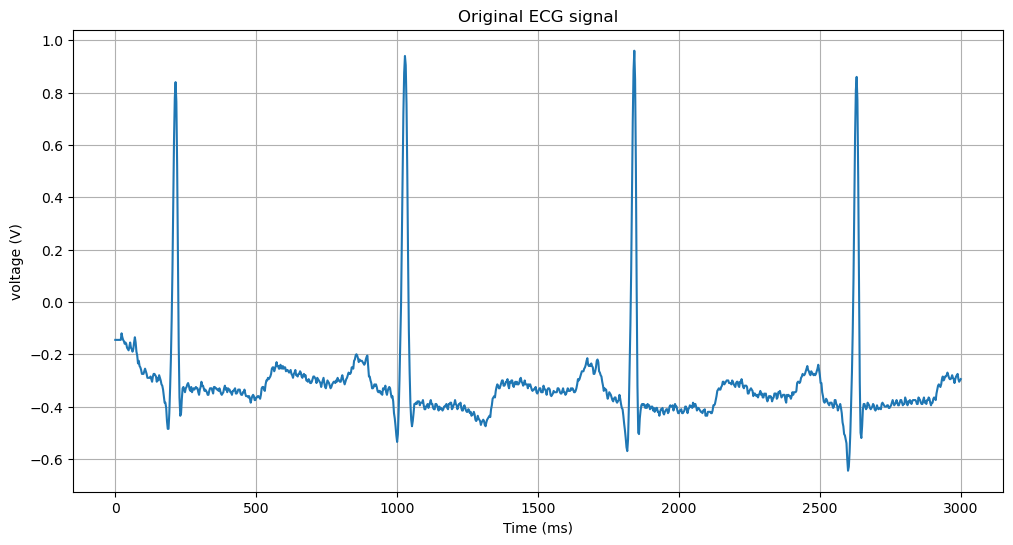

In [51]:

plt.figure(figsize=(12,6))
plt.plot(t,ecg_signal)
plt.title('Original ECG signal')
plt.xlabel('Time (ms)')
plt.ylabel('voltage (V)')
plt.grid(True)
plt.show()

## ECG with 50 Hz noise

In [52]:
# Sampling frequency and time
fs = 250  # Hz
time = np.arange(len(ecg_signal)) / fs

# Add 50Hz noise (powerline interference)
noise_amplitude = 0.5 * np.std(ecg_signal)  # Adjust amplitude
powerline_noise = noise_amplitude * np.sin(2 * np.pi * 50 * time)

# ECG with 50Hz noise
noisy_ecg = ecg_signal + powerline_noise

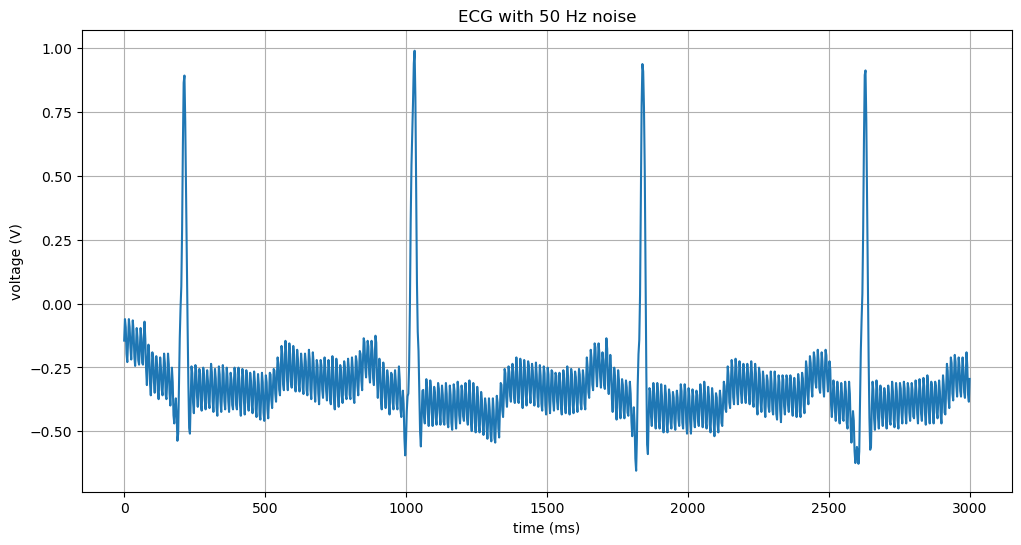

In [53]:
plt.figure(figsize=(12,6))
plt.plot(t,noisy_ecg)
plt.title('ECG with 50 Hz noise')
plt.xlabel('time (ms)')
plt.ylabel('voltage (V)')
plt.grid(True)
plt.show()

## Apply filter with Notch method

In [54]:
# Notch filter to remove 50Hz noise
notch_freq = 50.0  # Frequency to be removed
quality_factor = 30.0  # Quality factor determines notch width
b, a = signal.iirnotch(notch_freq, quality_factor, fs)

# Apply the notch filter
filtered_ecg = signal.filtfilt(b, a, noisy_ecg)

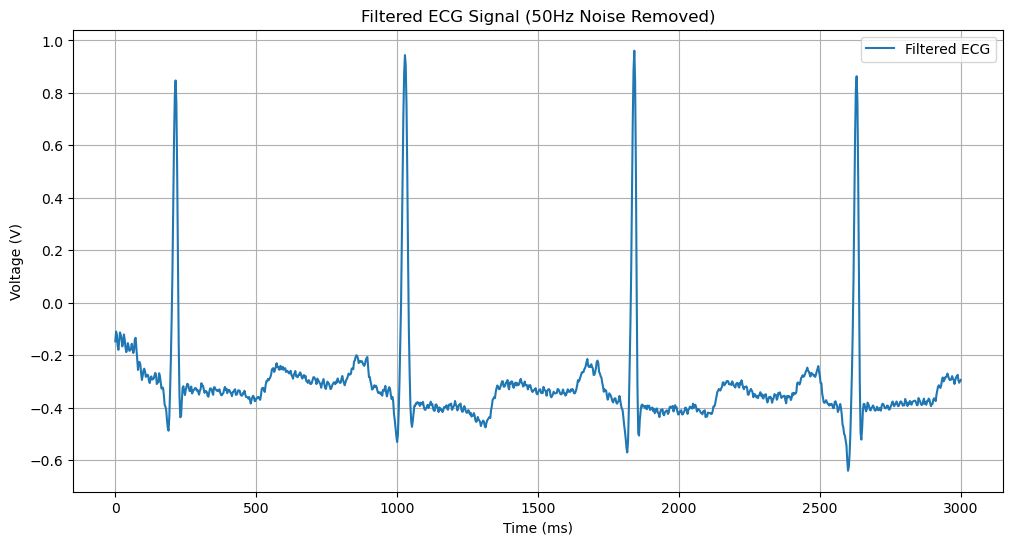

In [55]:
# Plot the filtered ECG
plt.figure(figsize=(12, 6))
plt.plot(t, filtered_ecg[:len(ecg_3ms)], label='Filtered ECG')
plt.title('Filtered ECG Signal (50Hz Noise Removed)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()

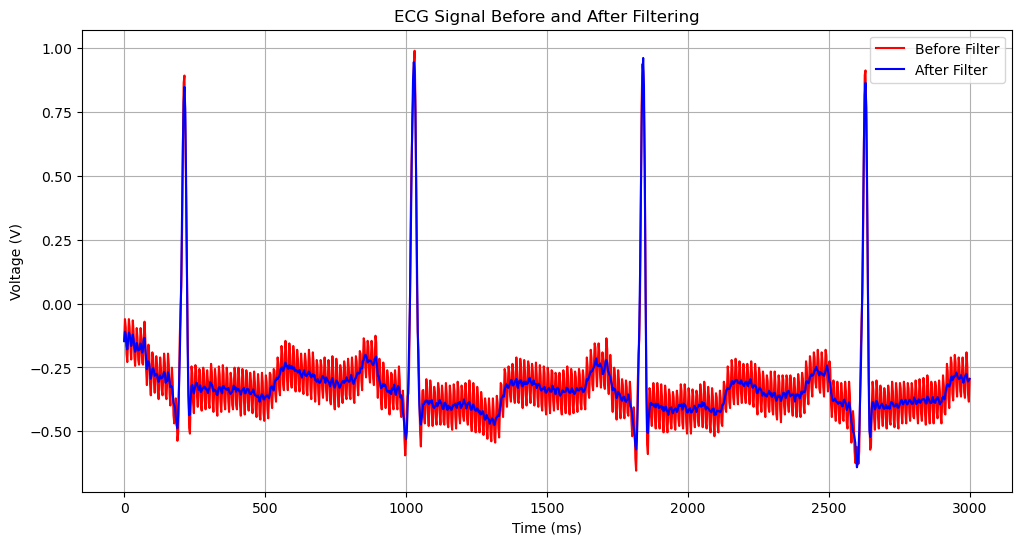

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(t, noisy_ecg, label='Before Filter', color='red')
plt.plot(t, filtered_ecg, label='After Filter', color='blue')
plt.title('ECG Signal Before and After Filtering')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.show()

## ECG with gaussian noise

In [134]:
noise_std = 0.4 * np.std(ecg_signal)
mean = np.mean(ecg_signal)
gaussian_noise = np.random.normal(mean, noise_std, len(ecg_signal))  # Generate Gaussian noise
Gnoise_ecg = ecg_signal + gaussian_noise  # Add noise to the ECG signal
print(f"standard deviation: {noise_std}")
print(f"mean: {mean}")

standard deviation: 0.07075985550842796
mean: -0.31457446808510636


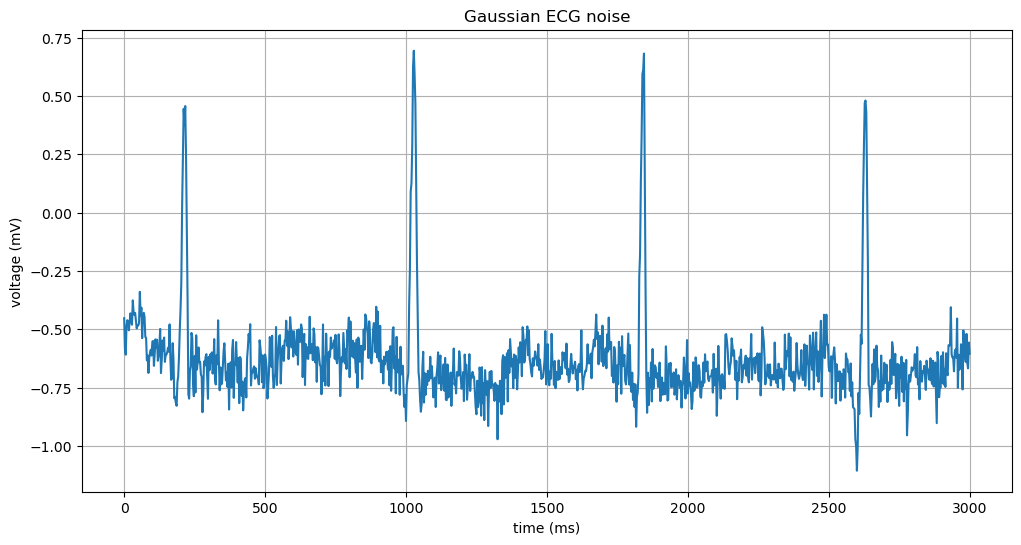

In [135]:
plt.figure(figsize=(12,6))
plt.plot(t,Gnoise_ecg)
plt.title('Gaussian ECG noise')
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.grid(True)
plt.show()

## Apply Filter with Band-pass method

In [136]:
# Design a Band-pass filter
fs =  250 # sampling frequency
low_cutoff, high_cutoff = 0.5, 40   # Range of frequency to pass  
order = 4 # filter order

# Normalize the cutoff frequency
nyquist = 0.5 * fs
normal_low = low_cutoff / nyquist
normal_high = high_cutoff / nyquist

# Create the filter
b, a = signal.butter(order, [normal_low,normal_high],btype='band')

# apply the filter
Bfilter_ecg = signal.filtfilt(b,a,Gnoise_ecg)
print(f"b coeff: {b}")
print(f"a coeff: {a}")

b coeff: [ 0.02196126  0.         -0.08784505  0.          0.13176758  0.
 -0.08784505  0.          0.02196126]
a coeff: [  1.          -5.40615451  12.76890746 -17.41964841  15.19071653
  -8.71644211   3.19734741  -0.68035375   0.06562741]


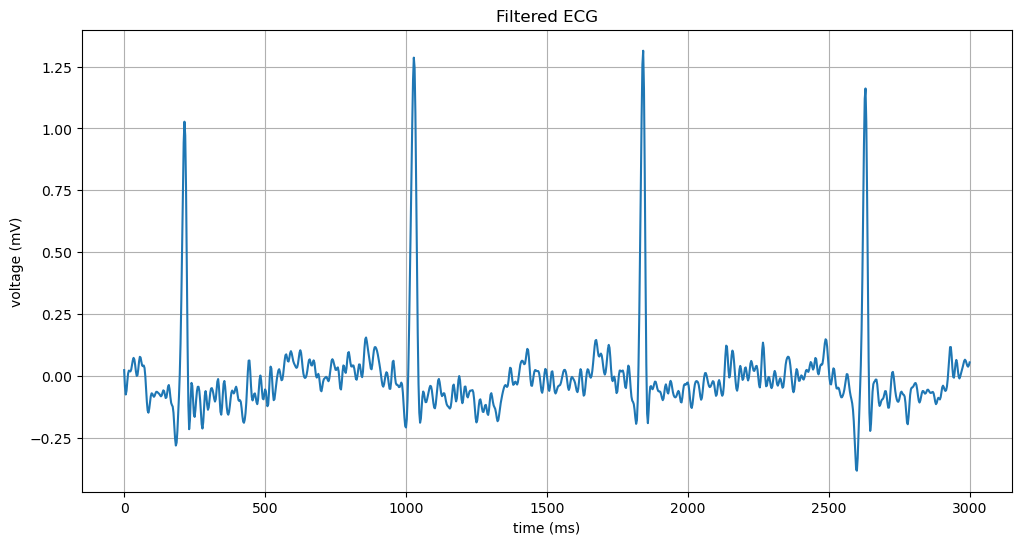

In [137]:
plt.figure(figsize=(12,6))
plt.plot(t,Bfilter_ecg)
plt.title('Filtered ECG')
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.grid(True)
plt.show()

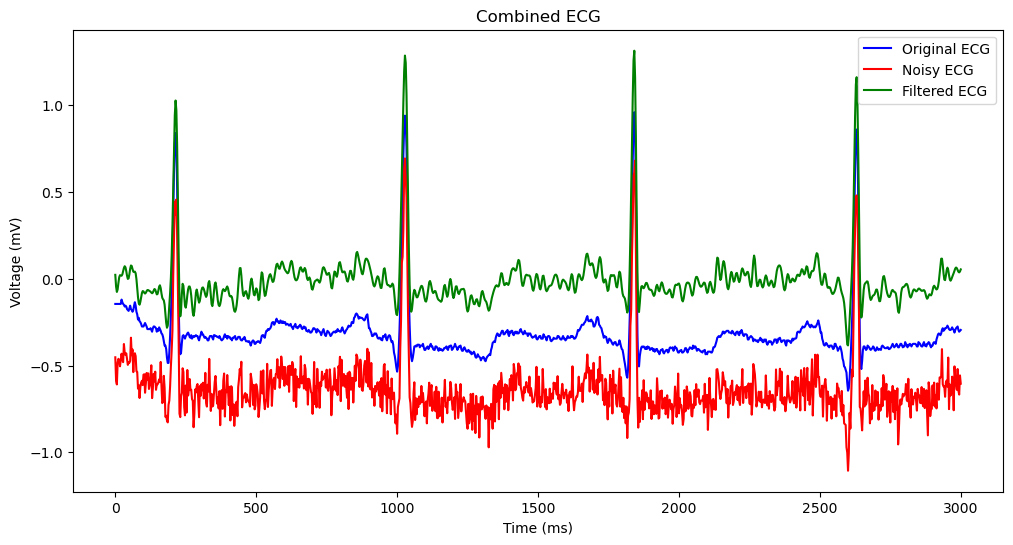

In [154]:
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_signal, label='Original ECG', color='blue')
plt.plot(t, Gnoise_ecg, label='Noisy ECG', color='red')
plt.plot(t, Bfilter_ecg, label='Filtered ECG', color='green')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Combined ECG')
plt.legend()
plt.show()